<a href="https://colab.research.google.com/github/aqeelabbaskhan41/Worldwide-Travel-Cities-Ratings-and-Climate-Data-Analysis/blob/main/DAV_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aqeel Abbas Khan NUM-BSCS-2022-38**

**Section A: Core Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

**Q: 01**

In [ ]:
df = pd.read_csv("/content/Worldwide Travel Cities Dataset (Ratings and Climate).csv")

In [ ]:
df.head()

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

In [ ]:
df.isnull().sum()

,0
id,0
city,0
country,0
region,0
short_description,0
latitude,0
longitude,0
avg_temp_monthly,0
ideal_durations,0
budget_level,0


In [ ]:
df['city'].count()

np.int64(560)

In [ ]:
df['country'].nunique()

167

In [ ]:
df['region'].nunique()

7

**Q: 2**

In [ ]:
df['Total_Theme_Score'] = df[['culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion']].sum(axis=1)

In [ ]:
top_10_cities = df.nlargest(10, 'Total_Theme_Score')[['city', 'Total_Theme_Score']]
top_10_cities

,city,Total_Theme_Score
234,Crete,37
50,Rio de Janeiro,36
200,San Diego,36
213,Honolulu,36
424,Vancouver,36
57,Barcelona,35
162,Cape Town,35
163,Castries,35
271,Sardinia,35
283,Sydney,35


**Q:3**

In [ ]:
europe_cities = df[df['region'] == 'europe'].copy()

In [ ]:
filtered_cities = europe_cities[
    (europe_cities['adventure'] >= 4) &
    (europe_cities['budget_level'].isin(['Mid-range', 'Budget']))
]
print(filtered_cities[['city', 'region',  'adventure', 'budget_level']])


               city  region  adventure budget_level
89           Annecy  europe          4    Mid-range
156          Azores  europe          4    Mid-range
217        Cornwall  europe          4    Mid-range
234           Crete  europe          4    Mid-range
252         Madeira  europe          4    Mid-range
259        La Palma  europe          4    Mid-range
271        Sardinia  europe          4    Mid-range
308           Lagos  europe          4    Mid-range
314        Biarritz  europe          4    Mid-range
343            Bled  europe          4    Mid-range
345        Asturias  europe          4    Mid-range
361       Innsbruck  europe          5    Mid-range
406         Algarve  europe          4    Mid-range
425         Keswick  europe          4    Mid-range
427    Isle of Skye  europe          4    Mid-range
541  Plitvice Lakes  europe          4    Mid-range
552       Rovaniemi  europe          4    Mid-range


**Section B: Data Visualization**

**Q:4**

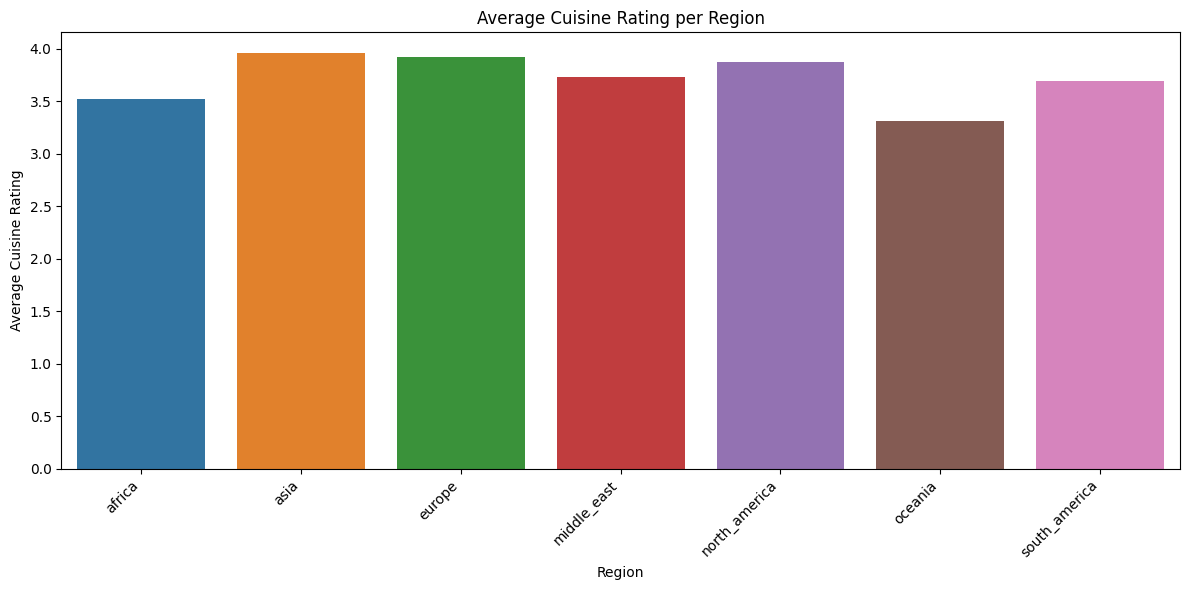

In [ ]:
# A bar plot showing average Cuisine rating per region
average_cuisine_rating_per_region = df.groupby('region')['cuisine'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='cuisine', data=average_cuisine_rating_per_region, hue='region')
plt.title('Average Cuisine Rating per Region')
plt.xlabel('Region')
plt.ylabel('Average Cuisine Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



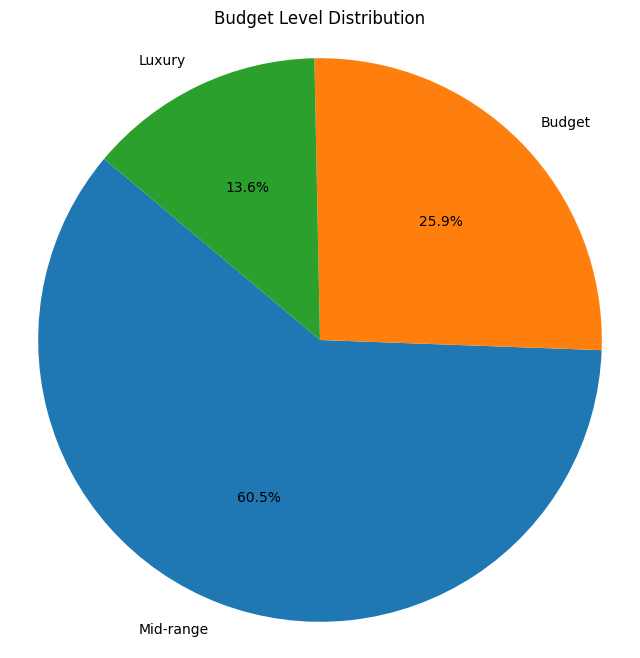

In [ ]:
# pie chart for Budget Level distribution
budget_level_counts = df['budget_level'].value_counts().reset_index()
budget_level_counts.columns = ['budget_level', 'count']
plt.figure(figsize=(8, 8))
plt.pie(budget_level_counts['count'], labels=budget_level_counts['budget_level'], autopct='%1.1f%%', startangle=140)
plt.title('Budget Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Q:5**

In [ ]:
fig = px.scatter(df,
                 x='adventure',
                 y='nightlife',
                 size='culture',
                 hover_name='city',
                 hover_data=['country'],
                 color='region',
                 title='Adventure vs. Nightlife Ratings (Size indicates Culture Score)')
fig.show()

**Q:6**

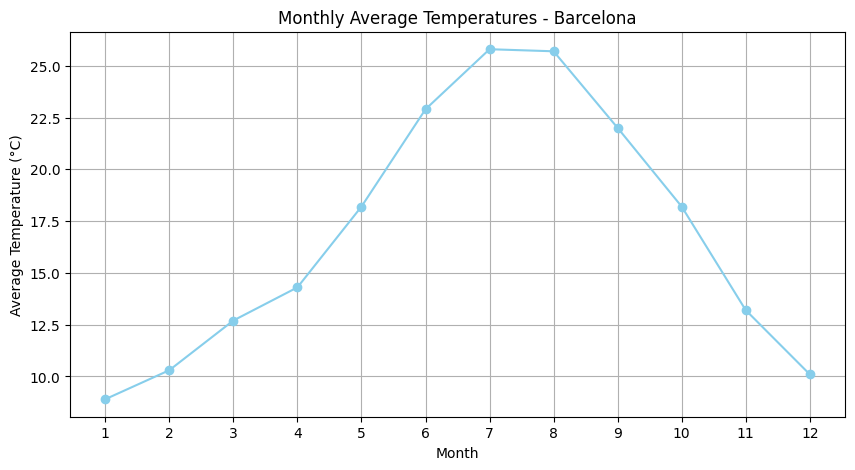

In [ ]:
import json
# the city (e.g., Barcelona)
city_name = "Barcelona"
city_row = df[df['city'] == city_name]

# Check if city exists
if city_row.empty:
    print(f"{city_name} not found in the dataset.")
else:
    # Parse the JSON from avg_temp_monthly
    climate_json = city_row['avg_temp_monthly'].values[0]
    climate_data = json.loads(climate_json)

    # Extract average temperatures for each month
    months = [str(i) for i in range(1, 13)]
    avg_temps = [climate_data[month]["avg"] for month in months]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(months, avg_temps, marker='o', linestyle='-', color='skyblue')
    plt.title(f"Monthly Average Temperatures - {city_name}")
    plt.xlabel("Month")
    plt.ylabel("Average Temperature (°C)")
    plt.grid(True)
    plt.xticks(months)
    plt.show()

**Section C: Dashboard Task Using Dash**

**Q:7**

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [ ]:
import dash
from dash import dcc, html, Input, Output

In [ ]:
# Parse the avg_temp_monthly column from string to dict
df["avg_temp_monthly"] = df["avg_temp_monthly"].apply(json.loads)

In [48]:
# Initialize Dash app
app = dash.Dash(__name__)
app.title = "City Explorer Dashboard"

# Light Theme (but keeping variable names as-is)
dark_bg = "#f5fafa"        # Light background (main page)
card_bg = "#1E1E1E"        # Can be used for graph bg if needed
text_color = "#000000"     # Black text for readability
accent_color = "#4FC3F7"   # Highlight color (buttons/headings)

# App Layout
app.layout = html.Div([
    html.H1(" Travel City Explorer", style={
        'textAlign': 'center',
        'color': accent_color,
        'marginTop': '20px'
    }),

    html.Div([
        html.Div([
            html.Label("Select Region:", style={'color': text_color}),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{"label": region.title(), "value": region} for region in sorted(df["region"].unique())],
                placeholder="Choose a region",
                style={'backgroundColor': card_bg, 'color': text_color}
            )
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.Label("Select Month:", style={'color': text_color}),
            dcc.Slider(
                id='month-slider', min=1, max=12, step=1, value=6,
                marks={i: str(i) for i in range(1, 13)},
                tooltip={"placement": "bottom", "always_visible": True}
            )
        ], style={'width': '48%', 'display': 'inline-block', 'padding': '10px', 'float': 'right'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'}),

    html.Div(id='top-cities-output', style={'color': accent_color, 'padding': '20px 10px'}),

    html.Div([
        dcc.Graph(id='score-bar-chart', config={'displayModeBar': False})
    ], style={'padding': '0 10px'}),

    html.Div([
        html.H3("Suggested Cities (20–30°C Avg Temp)", style={'color': accent_color}),
        html.Ul(id='suggested-cities', style={'color': text_color, 'paddingLeft': '20px'})
    ], style={'padding': '0 10px', 'marginBottom': '50px'})
], style={'backgroundColor': dark_bg, 'fontFamily': 'Segoe UI, sans-serif', 'minHeight': '100vh'})
# Callbacks
@app.callback(
    [Output('top-cities-output', 'children'),
     Output('score-bar-chart', 'figure'),
     Output('suggested-cities', 'children')],
    [Input('region-dropdown', 'value'),
     Input('month-slider', 'value')]
)
def update_dashboard(selected_region, selected_month):
    if not selected_region:
        return "", {}, []

    # Filter for region
    region_df = df[df["region"] == selected_region]

    # Top 5 cities by culture
    top5 = region_df.sort_values(by='culture', ascending=False).head(5)

    # Bar chart: Adventure, Nature, Nightlife
    melted_df = top5[["city", "adventure", "nature", "nightlife"]].melt(id_vars="city", var_name="Category", value_name="Score")
    fig = px.bar(melted_df, x="city", y="Score", color="Category", barmode="group",
                 title="Top 5 Cities - Culture vs Adventure, Nature, Nightlife")

    # Suggested cities for selected month with 20–30°C avg temp
    def is_temp_in_range(climate, month):
        month_str = str(month)
        if month_str in climate:
            return 20 <= climate[month_str]["avg"] <= 30
        return False

    suggested = region_df[region_df["avg_temp_monthly"].apply(lambda x: is_temp_in_range(x, selected_month))]

    city_list = [html.Li(f"{row['city']} - Avg Temp: {row['avg_temp_monthly'][str(selected_month)]['avg']}°C")
                 for _, row in suggested.iterrows()]

    return (
        html.H3(f"Top 5 Cities in {selected_region.title()} by Culture"),
        fig,
        city_list or [html.Li("No cities found in this temperature range.")]
    )

# Run server
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>